<a href="https://colab.research.google.com/github/AparnaRameshA95/Virtual_Competition/blob/main/Aparna_Ramesh_A_Virtual_competition_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [362]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [363]:
# Load the train dataset
train_df= pd.read_csv('/content/train_ctrUa4K.csv')
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [364]:
train_df.shape

(614, 13)

In [365]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [366]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [367]:
# Checking missing value
train_df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [368]:
# For categorical columns, fill with mode
for col in ['Gender', 'Married','Dependents','Self_Employed']:
    train_df[col].fillna(train_df[col].mode()[0], inplace=True)

# For numerical columns, removing null with median
for col in ['LoanAmount','Loan_Amount_Term','Credit_History']:
    train_df[col].fillna(train_df[col].median(), inplace=True)

train_df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


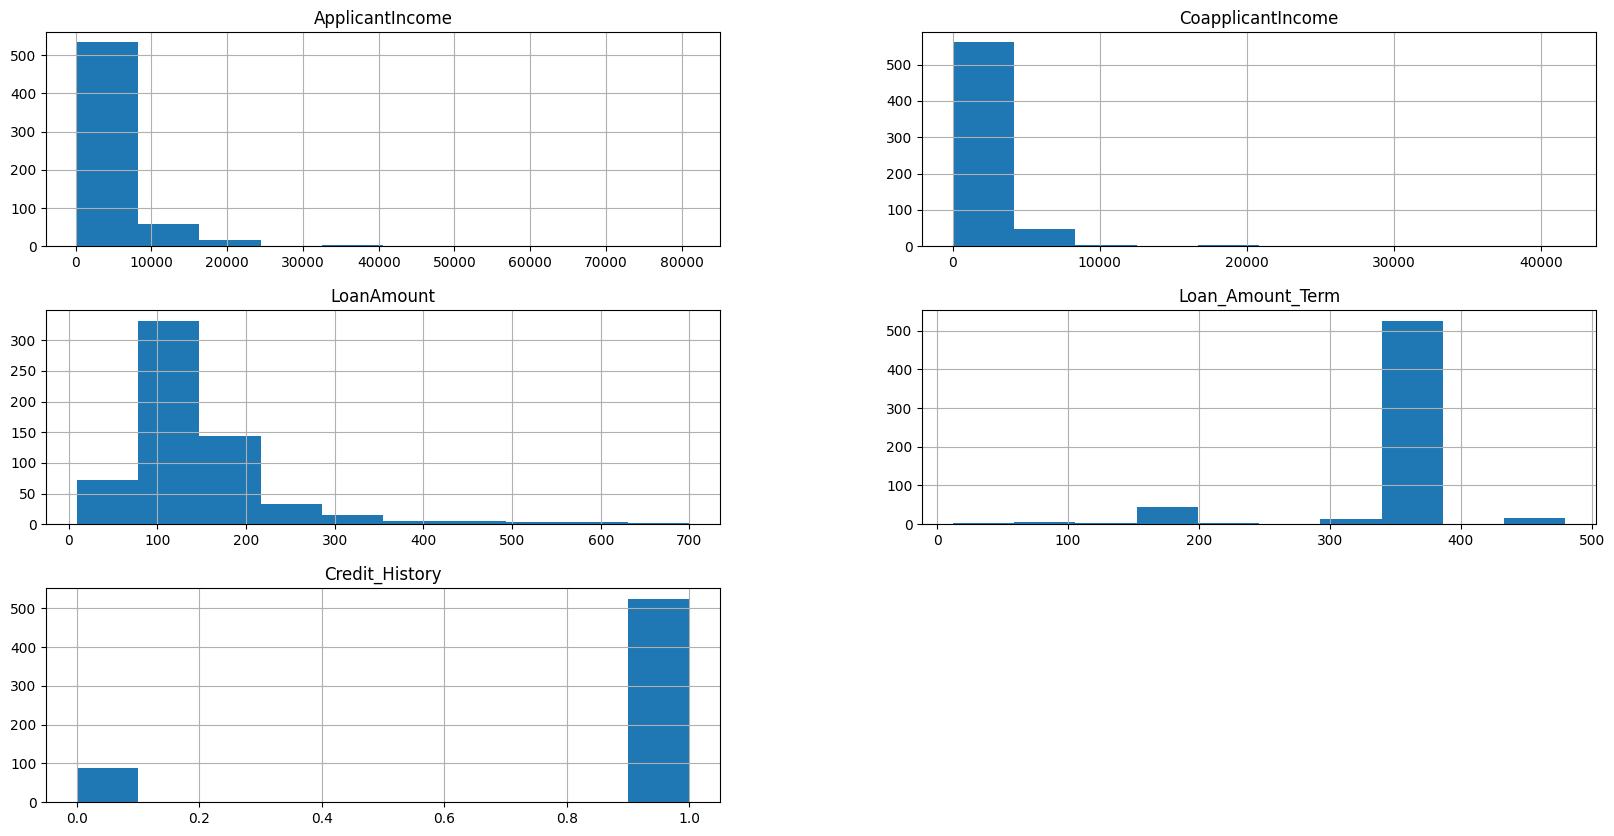

In [369]:
# frequency graph of features
train_df.select_dtypes(include=['float','int']).hist(figsize=(20,10))
plt.show()

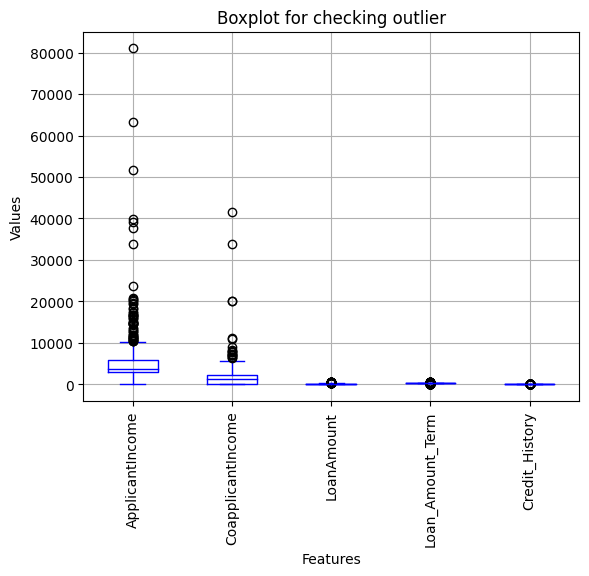

In [370]:
# Outlier checking using boxplot
train_df.boxplot(color='blue')
plt.xticks(rotation=90)
plt.title('Boxplot for checking outlier')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [371]:
# Detecting outliers using IQR
outlier_checking = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History']
Q1 = train_df[outlier_checking].quantile(0.25)
Q3 = train_df[outlier_checking].quantile(0.75)
IQR = Q3 - Q1
# Define outlier boundaries
outliers_lower = train_df[outlier_checking]<(Q1-1.5*IQR)
outliers_upper = train_df[outlier_checking]>(Q3 + 1.5*IQR)

#clip the outliers
train_df[outlier_checking] = train_df[outlier_checking].clip(lower = Q1-1.5*IQR, upper = Q3+1.5*IQR, axis = 1)

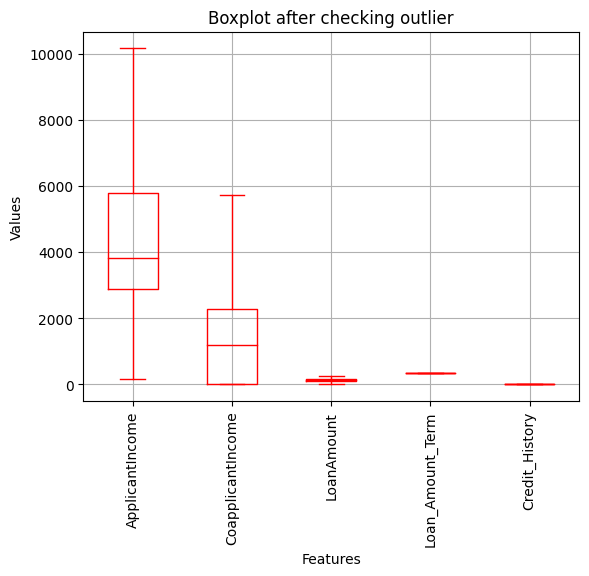

In [372]:
# Boxplot after IQR method
train_df.boxplot(color='red')
plt.xticks(rotation=90)
plt.title('Boxplot after checking outlier')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [373]:
# Perform Label Encoding
le = LabelEncoder()
train_df['Property_Area'] = le.fit_transform(df['Property_Area'])
train_df['Dependents'] = le.fit_transform(df['Dependents'])
train_df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

In [374]:
train_df = pd.get_dummies(train_df, columns=['Gender', 'Married', 'Education', 'Self_Employed'])
for column in train_df.columns:
    if train_df[column].dtype == 'bool':
        train_df[column] = train_df[column].astype(int)
train_df.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,LP001002,0,5849.0,0.0,128.0,360.0,1.0,2,1,0,1,1,0,1,0,1,0
1,LP001003,1,4583.0,1508.0,128.0,360.0,1.0,0,0,0,1,0,1,1,0,1,0
2,LP001005,0,3000.0,0.0,66.0,360.0,1.0,2,1,0,1,0,1,1,0,0,1
3,LP001006,0,2583.0,2358.0,120.0,360.0,1.0,2,1,0,1,0,1,0,1,1,0
4,LP001008,0,6000.0,0.0,141.0,360.0,1.0,2,1,0,1,1,0,1,0,1,0


In [375]:
# Scale the Features
scaler = StandardScaler()
train_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History']] = scaler.fit_transform(train_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History']])
train_df.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,LP001002,0,0.497164,-0.874587,-0.168041,0.0,0.0,2,1,0,1,1,0,1,0,1,0
1,LP001003,1,-0.013767,0.054395,-0.168041,0.0,0.0,0,0,0,1,0,1,1,0,1,0
2,LP001005,0,-0.652632,-0.874587,-1.280462,0.0,0.0,2,1,0,1,0,1,1,0,0,1
3,LP001006,0,-0.820924,0.578025,-0.311579,0.0,0.0,2,1,0,1,0,1,0,1,1,0
4,LP001008,0,0.558104,-0.874587,0.065209,0.0,0.0,2,1,0,1,1,0,1,0,1,0


In [376]:
# Load the test dataset
test_df = pd.read_csv('/content/test_lAUu6dG.csv')
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [377]:
test_df.shape

(367, 12)

In [378]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [379]:
test_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [380]:
# Checking missing values
test_df.isnull().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


In [381]:
# For categorical columns, fill with mode
for col in ['Gender','Dependents','Self_Employed']:
    test_df[col].fillna(test_df[col].mode()[0], inplace=True)

# For numerical columns, removing null with median
for col in ['LoanAmount','Loan_Amount_Term','Credit_History']:
    test_df[col].fillna(test_df[col].median(), inplace=True)

test_df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


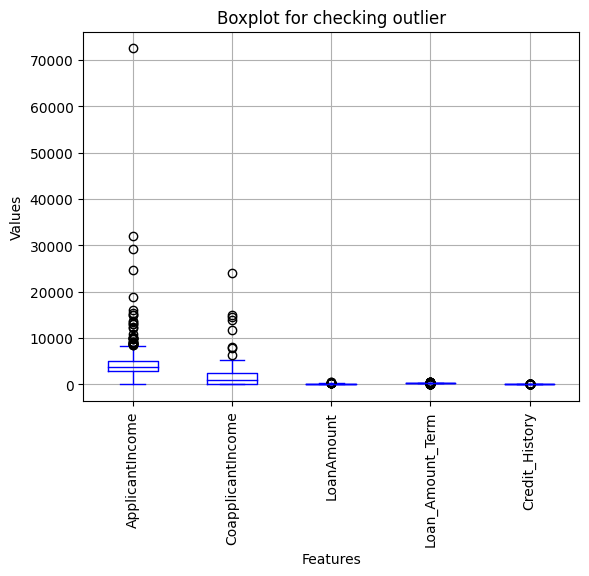

In [382]:
# Outlier checking using boxplot
test_df.boxplot(color='blue')
plt.xticks(rotation=90)
plt.title('Boxplot for checking outlier')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

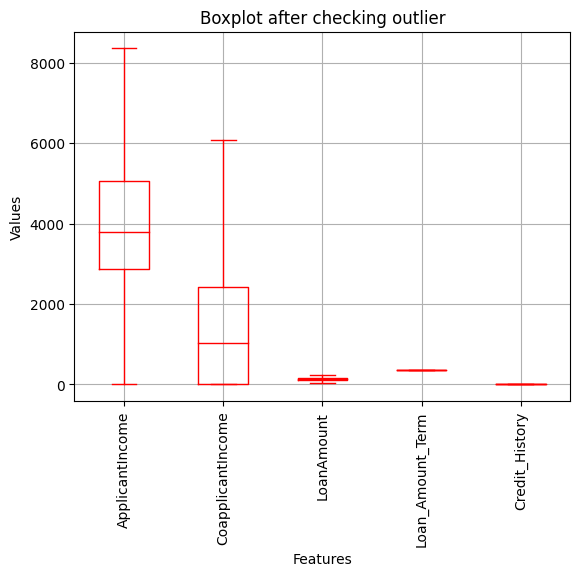

In [383]:
# Detecting outliers using IQR
outlier_checking = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History']
Q1 = test_df[outlier_checking].quantile(0.25)
Q3 = test_df[outlier_checking].quantile(0.75)
IQR = Q3 - Q1
# Define outlier boundaries
outliers_lower = test_df[outlier_checking]<(Q1-1.5*IQR)
outliers_upper = test_df[outlier_checking]>(Q3 + 1.5*IQR)

#clip the outliers
test_df[outlier_checking] = test_df[outlier_checking].clip(lower = Q1-1.5*IQR, upper = Q3+1.5*IQR, axis = 1)

# Boxplot after IQR method
test_df.boxplot(color='red')
plt.xticks(rotation=90)
plt.title('Boxplot after checking outlier')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [384]:
# Perform Label Encoding
le = LabelEncoder()
test_df['Property_Area'] = le.fit_transform(test_df['Property_Area'])
test_df['Dependents'] = le.fit_transform(test_df['Dependents'])

In [385]:
test_df = pd.get_dummies(test_df, columns=['Gender', 'Married', 'Education', 'Self_Employed'])
for column in test_df.columns:
    if test_df[column].dtype == 'bool':
        test_df[column] = test_df[column].astype(int)
test_df.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,LP001015,0,5720,0.0,110.0,360.0,1.0,2,0,1,0,1,1,0,1,0
1,LP001022,1,3076,1500.0,126.0,360.0,1.0,2,0,1,0,1,1,0,1,0
2,LP001031,2,5000,1800.0,208.0,360.0,1.0,2,0,1,0,1,1,0,1,0
3,LP001035,2,2340,2546.0,100.0,360.0,1.0,2,0,1,0,1,1,0,1,0
4,LP001051,0,3276,0.0,78.0,360.0,1.0,2,0,1,1,0,0,1,1,0


In [386]:
# Scale the Features
scaler = StandardScaler()
test_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History']] = scaler.fit_transform(test_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History']])
test_df.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,LP001015,0,0.760162,-0.892107,-0.468560,0.0,0.0,2,0,1,0,1,1,0,1,0
1,LP001022,1,-0.596907,0.046623,-0.127134,0.0,0.0,2,0,1,0,1,1,0,1,0
2,LP001031,2,0.390612,0.234369,1.622677,0.0,0.0,2,0,1,0,1,1,0,1,0
3,LP001035,2,-0.974669,0.701230,-0.681952,0.0,0.0,2,0,1,0,1,1,0,1,0
4,LP001051,0,-0.494255,-0.892107,-1.151413,0.0,0.0,2,0,1,1,0,0,1,1,0


In [387]:
# Split the data into features and target variable
X_train = train_df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y_train = train_df['Loan_Status']

In [388]:
# Create and train the logistic regression model
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)
# Make prediction on the test set
X_test = test_df.drop('Loan_ID', axis=1)
y_pred = logit_model.predict(X_test)

print('Prediction is', y_pred)

Prediction is [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [389]:
y_pred_labels = []
for i in range(len(y_pred)):
    if y_pred[i] == 1:
        y_pred_labels.append('Y')
    else:
        y_pred_labels.append('N')
print('Prediction is', y_pred_labels)

Prediction is ['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 

In [390]:
import pandas as pd
import csv  # Import the csv module


# Create a DataFrame from the Loan IDs and predictions
output_df = pd.DataFrame({
    'Loan_ID': test_df['Loan_ID'],
    'Loan_Status': y_pred_labels
})

# Save to CSV without quotes around the labels
output_df.to_csv('loan_predictions.csv', index=False, quoting=csv.QUOTE_NONE)

In [391]:
pred_df = pd.read_csv('/content/loan_predictions.csv')
pred_df.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
